In [2]:
import pandas
import matplotlib.pyplot as plt

# Read the data
data = pandas.read_csv('./norm/norm10.csv', header=None)
data

,0,1,2,3
0,C,C,D,D
1,C,D,C,D
2,1,0,1,0


In [3]:
import pandas
import os

norm2data_paths = dict()
for root, dirs, files in os.walk("./log/"):
    norm = root.split("/")[-1]
    for file in files:
        if file.endswith(".csv") and file.find("s-1") != -1 and file.find(r"uStepN-1.")  != -1 and file.find(r'norm10') != -1:
            if norm2data_paths.get(norm) is None:
                norm2data_paths[norm] = []
                norm2data_paths[norm].append(os.path.join(root, file))
            else:
                norm2data_paths[norm].append(os.path.join(root, file))
            print(os.path.join(root, file))
print(norm2data_paths)

# 对norm2data_paths按照key的大小排序
norm2data_paths = sorted(norm2data_paths.items(), key=lambda d:d[0])
# 排序完成后再转化为dict
norm2data_paths = dict(norm2data_paths)
print(norm2data_paths)



data = pandas.read_csv(norm2data_paths['norm10'][0])
data

./log/norm10/stepNum-2000_population-200_s-1.000000_b-4_beta-3_c-1_gamma-1_mu-0.000000_norm-norm10_uStepN-1.csv
{'norm10': ['./log/norm10/stepNum-2000_population-200_s-1.000000_b-4_beta-3_c-1_gamma-1_mu-0.000000_norm-norm10_uStepN-1.csv']}
{'norm10': ['./log/norm10/stepNum-2000_population-200_s-1.000000_b-4_beta-3_c-1_gamma-1_mu-0.000000_norm-norm10_uStepN-1.csv']}


,step,C-NR,C-SR,C-AR,C-UR,OC-NR,OC-SR,OC-AR,OC-UR,OD-NR,...,D-AR,D-UR,C,OC,OD,D,NR,SR,AR,UR
0,0,0.020,0.045,0.065,0.065,0.070,0.080,0.060,0.070,0.065,...,0.075,0.040,0.195,0.280,0.290,0.235,0.220,0.240,0.305,0.235
1,2,0.025,0.045,0.035,0.045,0.080,0.075,0.085,0.065,0.090,...,0.035,0.040,0.150,0.305,0.315,0.230,0.280,0.290,0.200,0.230
2,3,0.035,0.060,0.005,0.045,0.085,0.135,0.100,0.060,0.090,...,0.045,0.050,0.145,0.380,0.295,0.180,0.250,0.340,0.195,0.215
3,4,0.035,0.045,0.015,0.035,0.110,0.165,0.070,0.070,0.065,...,0.055,0.030,0.130,0.415,0.245,0.210,0.290,0.340,0.190,0.180
4,5,0.060,0.055,0.010,0.045,0.135,0.140,0.045,0.100,0.050,...,0.035,0.035,0.170,0.420,0.195,0.215,0.325,0.325,0.125,0.225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
1996,1997,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
1997,1998,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
1998,1999,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000


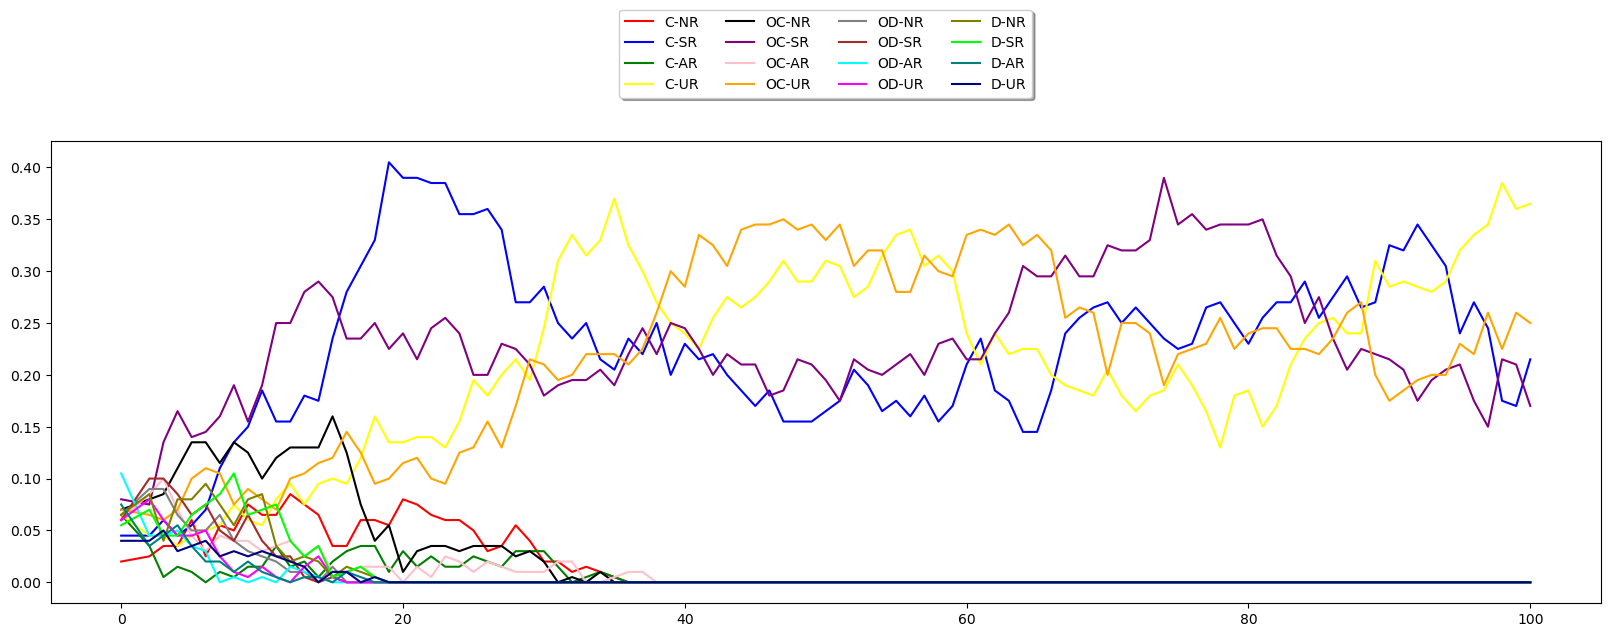

In [4]:
# 第一列为横轴，第二列为纵轴画曲线，label为列名
# 设置cmap
colors = ['red', 'blue', 'green', 'yellow', 'black', 'purple', 'pink', 'orange', 'gray', 'brown', 'cyan', 'magenta',
          'olive', 'lime', 'teal', 'navy']
plt.figure(figsize=(20, 6))
for i in range(1, 17):
    plt.plot(data.iloc[:100, 0], data.iloc[:100, i], label=data.columns.values[i], color=colors[i - 1])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), ncol=4, fancybox=True, shadow=True)
# plt.savefig('./norm10-c-ur.png', dpi=600)

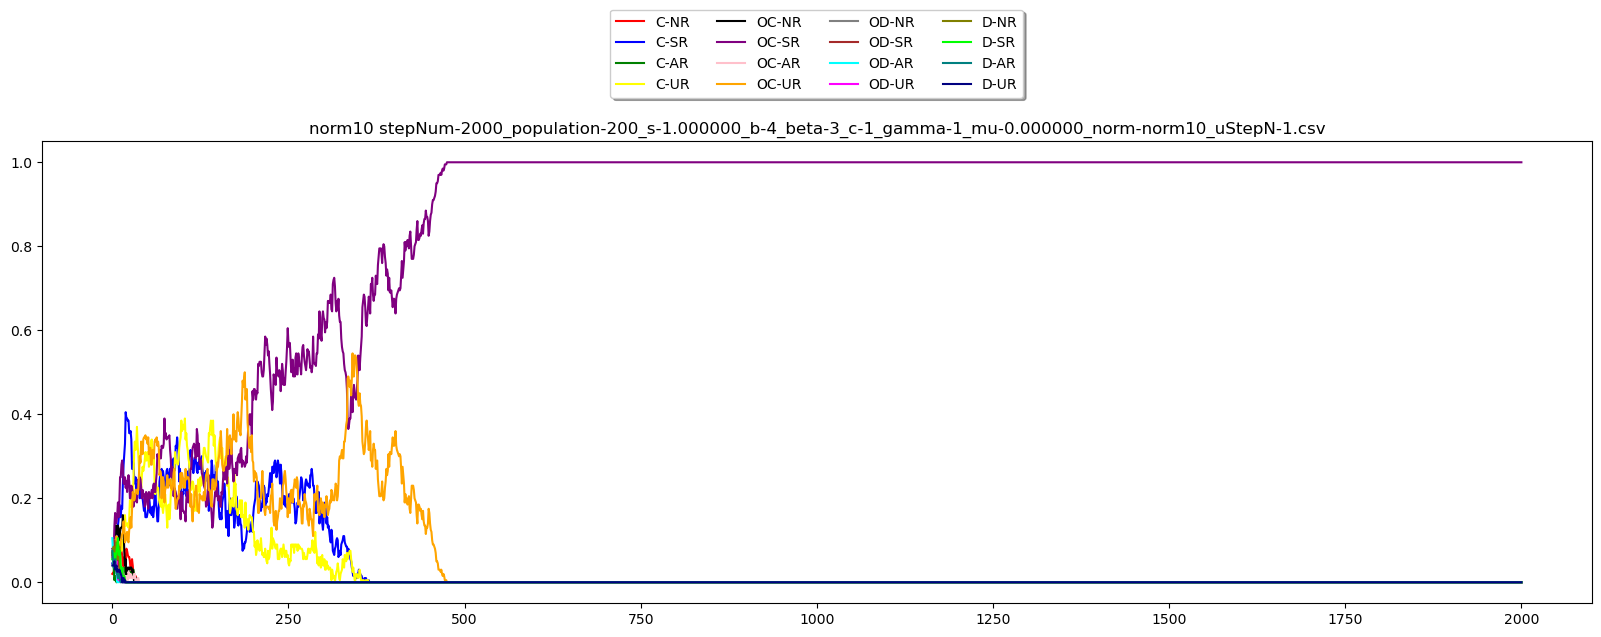

In [5]:

# 遍历 norm2data_paths
for norm, data_paths in norm2data_paths.items():
    # 遍历 data_paths
    for data_path in data_paths:
        # 读取数据
        data = pandas.read_csv(data_path)
        # 第一列为横轴，第二列为纵轴画曲线，label为列名
        # 设置cmap
        colors = ['red', 'blue', 'green', 'yellow', 'black', 'purple', 'pink', 'orange', 'gray', 'brown', 'cyan', 'magenta',
                  'olive', 'lime', 'teal', 'navy']
        plt.figure(figsize=(20, 6))
        for i in range(1, 17):
            plt.plot(data.iloc[:, 0], data.iloc[:, i], label=data.columns.values[i], color=colors[i - 1])
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.30), ncol=4, fancybox=True, shadow=True)
        plt.title(norm + ' ' + data_path.split('/')[-1])
        # plt.savefig('./norm10-c-ur.png', dpi=600)